In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
data=pd.read_csv('/home/aritra/Downloads/ML materials udemy/Multplr_LR_Code_for Udemy/Housing.csv')

In [123]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [124]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [126]:
data['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [127]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [128]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [129]:
data['mainroad']=data['mainroad'].map({'yes':1,'no':0})
data['guestroom']=data['guestroom'].map({'yes':1,'no':0})
data['basement']=data['basement'].map({'yes':1,'no':0})
data['hotwaterheating']=data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning']=data['airconditioning'].map({'yes':1,'no':0})
data['prefarea']=data['prefarea'].map({'yes':1,'no':0})

##### converting yes , no categorical values into 1 , 0 as a part of data processing.

In [130]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


###### converting the categorical values under 'furnishingstatus'
using pd.get_dummies() method , which returns a dataframe #status here 

In [131]:
status=pd.get_dummies(data['furnishingstatus'])

In [132]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


###### Dropping the first column in the staus dataframe bcz, we can calculate the values of it using the other 2 columns.

In [133]:
status=pd.get_dummies(data['furnishingstatus'],drop_first=True)

In [134]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [135]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [136]:
data=pd.concat([data,status],axis=1)

In [137]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [138]:
data.drop(['furnishingstatus'],axis=1,inplace=True)

In [139]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


###### Creating new variable (columns) also called as derived columns from esisting dataset

In [140]:
data['areaperbedroom']=data['area']/data['bedrooms']

In [141]:
data['bbratio']=data['bathrooms']/data['bedrooms']

In [142]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


###### Variable rescaling
Rescaling is done here to bring all the columns(variables) to a comaparable scale or else one variable can be dominating 
whose values is high.
like the area column here , its very large as compared to the other values, so it need to be scaled down.

Using normalization method of rescaling here.

In [143]:
def normalize(x):
    return (  ((x-np.min(x))/(np.max(x)-np.min(x)))  )

In [144]:
data=data.apply(normalize)

In [145]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [146]:
x=data.iloc[:,1:]
y=data.loc[:,'price']

In [147]:
#splitting now into training and testing set
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

###### Building model using statsmodels

In [148]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
lg=sm.OLS(y_train,x_train).fit()

In [149]:
print(lg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.56e-82
Time:                        22:34:07   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

###### Checking VIF (variation Inflation Factor)of every vars to avoid the problem of multicollinearity.
https://www.youtube.com/watch?v=zNsk52Aj5r0         or
http://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

Defining a function which generates VIF for every variable 

In [157]:
def vif(input_data,dependent_col):
    #creating a empty dataframe with only columns name in it.
    vif_df=pd.DataFrame(columns=['Var','vif'])
    #dropping the dependent column passed as param 'price' here and returning the dataframe .
    x_vars=input_data.drop([dependent_col],axis=1)
    #all the column names in te returned dataframe are stored here in the form of array
    xvar_names=x_vars.columns
    #loop to iter through each element in the previous array 'xvar_names'.
    for i in range(0,xvar_names.shape[0]):
    #selecting the first variable as response here
        y=x_vars[xvar_names[i]]
    #dropping the response variable now and returning the dataframe without it that means with other variables(columns),
        x=x_vars[xvar_names.drop(xvar_names[i])]
    #fitting and calculating the rsquare value.
        rsquare=sm.OLS(y,x).fit().rsquared
        vif=round( (1/(1-rsquare)) ,2)
    #adding the column name on LHS and its VIF value on RHS in i'th row 
        vif_df.loc[i]=[xvar_names[i],vif]
    return vif_df.sort_values(by='vif',axis=0,ascending=False,inplace=False)    

In [158]:
vif(input_data=data,dependent_col='price')

,Var,vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

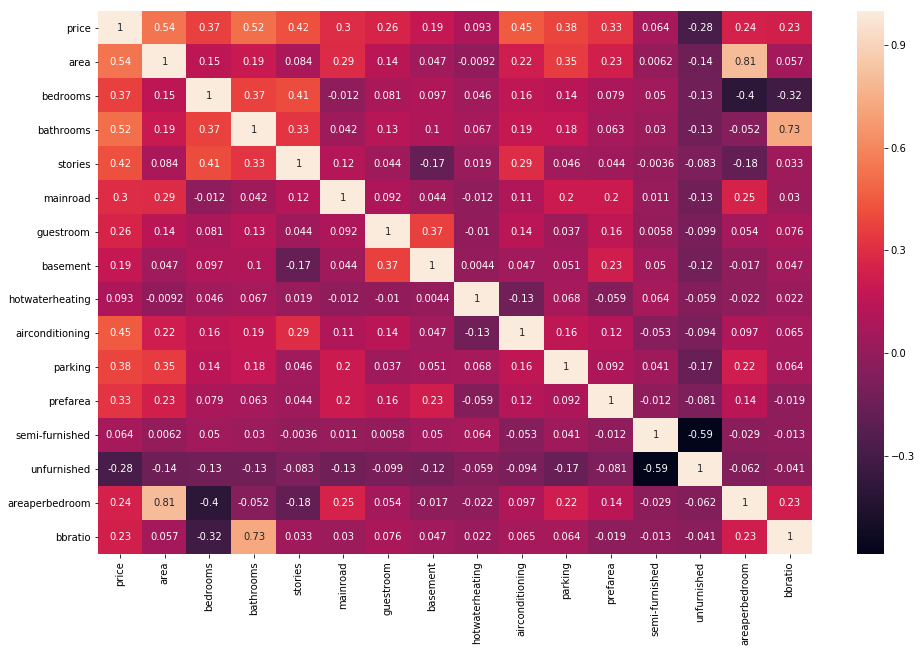

In [160]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)

we found that the var 'bbratio' has both its pvalue and VIF high so we delete it.

In [161]:
x_train=x_train.drop(['bbratio'],axis=1)

###### Now we will fit again and see the summary of pvalues

In [163]:
#second fitted model
lg2=sm.OLS(y_train,x_train).fit()

In [164]:
print(lg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.46e-83
Time:                        23:03:59   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

###### Again calculating the VIF's 

In [167]:
#we calculate the VIF's again without the bbratio, so we drop it and pass to the vif() function
vif(input_data=data.drop(['bbratio'],axis=1),dependent_col='price')

,Var,vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


we found that now the var 'bedroom' has both its pvalue and VIF high so we delete it.

In [172]:
x_train=x_train.drop(['bedrooms'],axis=1)

Again we buid the model and find the summary

In [173]:
#creting the model for third time 
lg3=sm.OLS(y_train,x_train).fit()

In [174]:
print(lg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.66e-83
Time:                        23:17:11   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [176]:
#calculating the VIF's again without the 'bedroom' and 'bbratio'
vif(input_data=data.drop(['bbratio','bedrooms'],axis=1),dependent_col='price')

,Var,vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


###### we found that now the var 'areaperbedroom' has both its pvalue and VIF high so we delete it.

In [177]:
x_train=x_train.drop(['areaperbedroom'],axis=1)

again we build the model and find the summary of pvalues

In [178]:
#we build the model for the 4th time now
lg4=sm.OLS(y_train,x_train).fit()

In [179]:
print(lg4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.35e-83
Time:                        23:31:36   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [181]:
#we find the Vif's again without 'areaperbedroom', 'bbratio','bedrooms'
vif(input_data=data.drop(['areaperbedroom','bbratio','bedrooms'],axis=1),dependent_col='price')

,Var,vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


Now we will drop the 'semi-furnished' var(column) bcz it has higher pvalue which indicates it has no significance inspite 
of having a low VIF.

In [182]:
x_train=x_train.drop(['semi-furnished'],axis=1)

We build the model again and find the summary

In [183]:
lg5=sm.OLS(y_train,x_train).fit()

In [184]:
print(lg5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.73e-84
Time:                        23:37:16   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [185]:
vif(input_data=data.drop(['semi-furnished','areaperbedroom','bbratio','bedrooms'],axis=1),dependent_col='price')

,Var,vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


###### we found that now the var 'basement' has both its pvalue and VIF high so we delete it.

In [186]:
x_train=x_train.drop(['basement'],axis=1)

we build the model again and find the summary

In [187]:
lg6=sm.OLS(y_train,x_train).fit()

In [188]:
print(lg6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.13e-84
Time:                        23:41:24   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [189]:
#we find the VIF's now without 'basement','semi-furnished','areaperbedroom','bbratio','bedrooms'. 
vif(input_data=data.drop(['basement','semi-furnished','areaperbedroom','bbratio','bedrooms'],axis=1),dependent_col='price')

,Var,vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


##### NOW we found that all pvalues are less than the significance level for our problem which was 0.01 and the VIF's too 
has reached a suitable range that is all less than 5. So we stop the process here.

### Now making the prediction using the final model after removing all the multicollinearity

In [197]:
#adding the constant term
x_test_new=sm.add_constant(x_test)

In [199]:
#dropping the uselsss columns
x_test_new=x_test_new.drop(['basement','semi-furnished','areaperbedroom','bbratio','bedrooms'],axis=1)

In [203]:
#final prediction
y_predict=lg6.predict(x_test_new)

#### Plotting the output

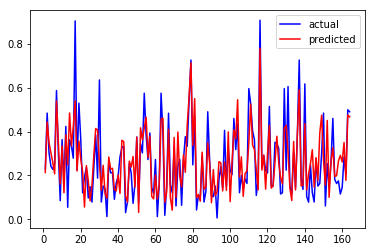

In [206]:
c=[val for val in range(1,165)]
plt.figure(1)
plt.plot(c,y_test,color='b')
plt.plot(c,y_predict,color='r')
plt.legend(['actual','predicted'])


Text(0,0.5,'Predicted')

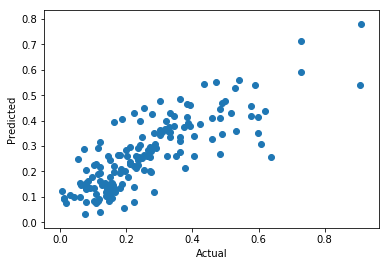

In [209]:
plt.figure(2)
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0,0.5,'error')

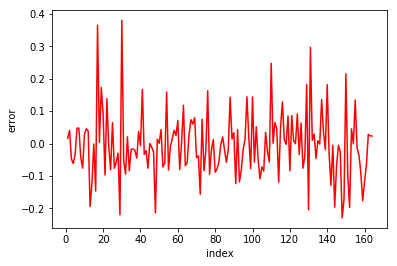

In [211]:
plt.figure(3)
plt.plot(c,y_test-y_predict,color='r')
plt.xlabel('index')
plt.ylabel('error')